In [52]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('./insurance.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
#카테고리형을 숫자 변수로 바꿔주는 코드
from sklearn.preprocessing import LabelEncoder

#data.sex.drop_duplicates()  중복되는 것을 제거하고 unique한 변수만 출력
#data.drop_duplicates('sex') 데이터에서 sex에서 중복되는 것을 제거한 후 데이터프레임 출력
#data.sex = le.transform(data.sex)  열을 숫자형으로 변경

le = LabelEncoder()
#sex
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)


data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
#각 변수별 상관관계를 분석 -> 히트맵으로 표현하기

data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

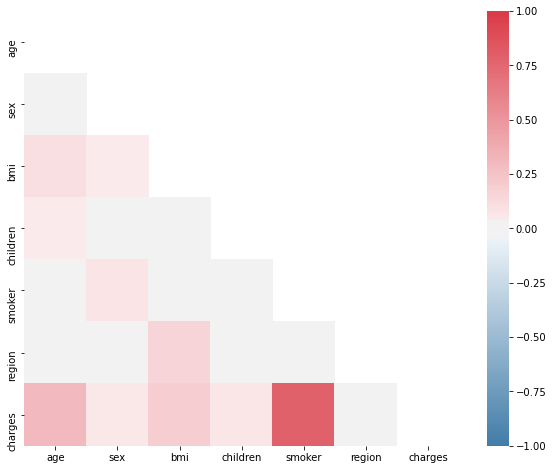

In [7]:
#그림 크기 지정
f, ax = plt.subplots(figsize=(10, 8))

corr = data.corr()
#mask : 가릴 데이터(true면 가리고 false면 나타냄) 
#상관행렬은 대칭이니 간단하게 보기
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
#vmin/vmax : 값의 최대 최소 
#cmap : color map
sns.heatmap(corr, mask=mask,vmin=-1,vmax=1, cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [9]:
#gridplot 안에 p에 대괄호 해야한다.
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot([p],ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

담배와 치료비가 가장 높은 상관관계를 가졌으며, 나이, 체지방률도 치료비와 약간의 양의 상관관계를 가진 것으로 나타났다.    

<AxesSubplot:xlabel='charges'>

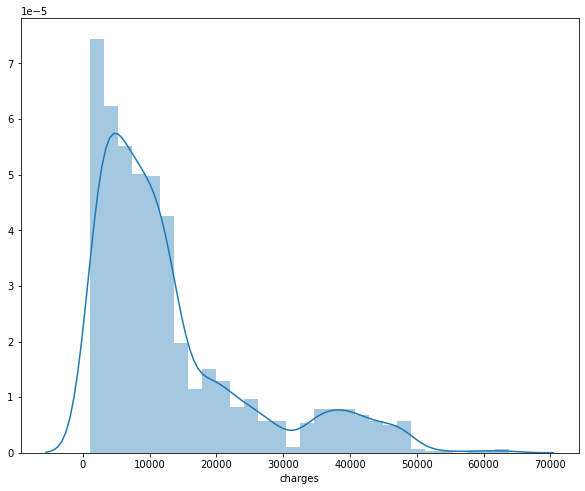

In [10]:
#charge의 전체적인 분포를 보기 위해 분포함수를 그려봄
f, ax = plt.subplots(figsize=(10, 8))
sns.distplot(data.charges)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

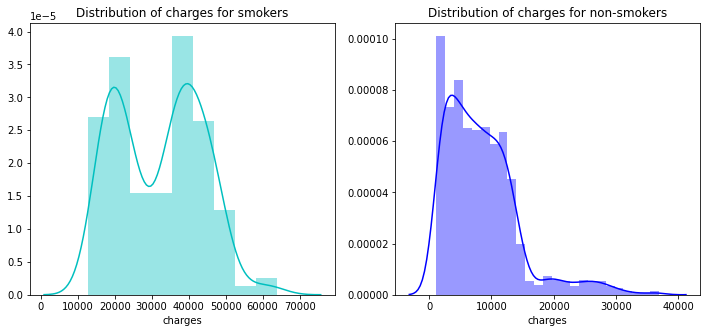

In [11]:
#흡연자와 비흡연자의 치료비 분포 비교 -> 흡연자의 치료비가 더 많이 드는 것으로 보임
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

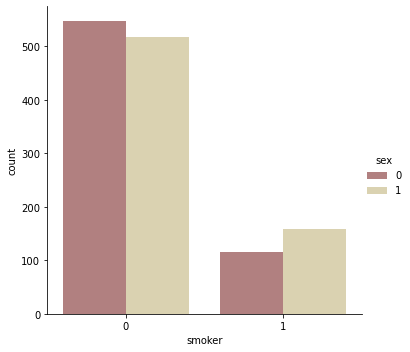

In [12]:
#흡연자 중 남여 비율
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

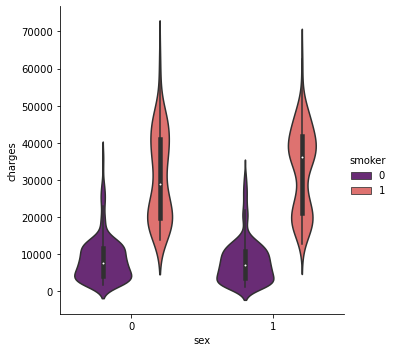

In [13]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

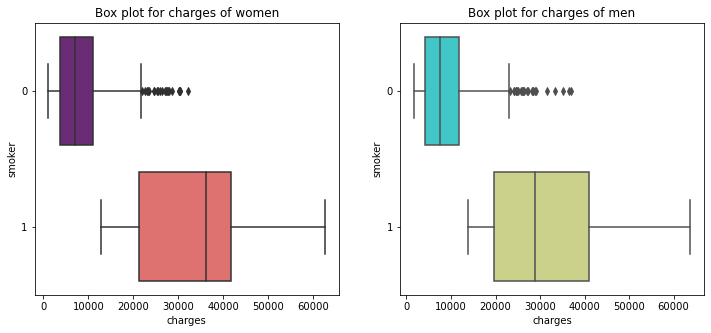

In [14]:
#남여 각각의 흡연자와 비흡연자의 치료비 박스플롯
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

ax=f.add_subplot(122)
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

남 여 에서 비슷한 추이를 보임

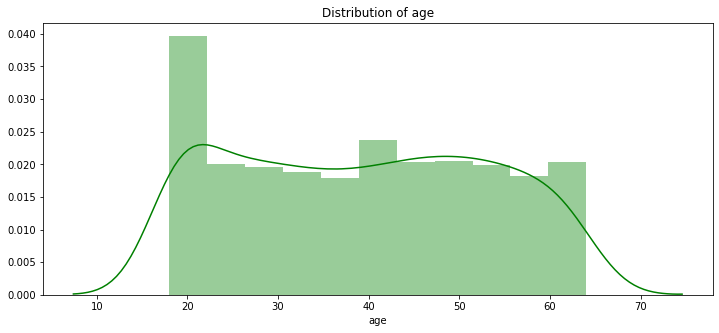

In [15]:
#나이의 분포도
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

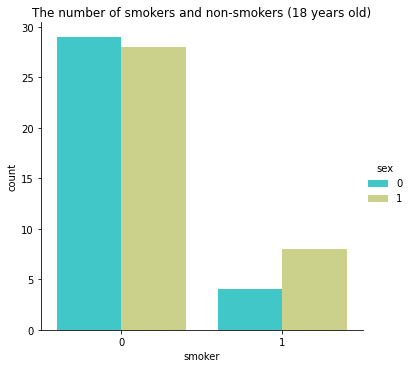

In [16]:
#18세 이하 (미성년)의 흡연비율 확인
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

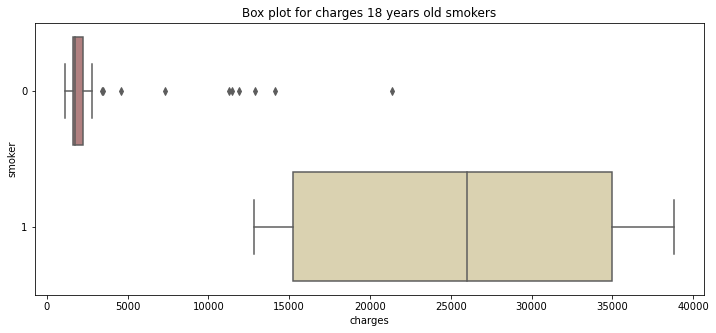

In [17]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

18세 이하의 미성년의 경우 흡연자의 치료비가 현저하게 높은 것을 확인할 수 있다. 

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

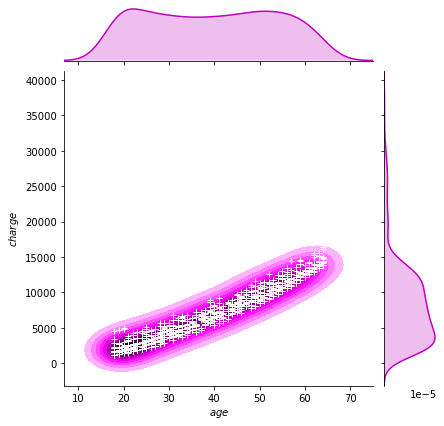

In [18]:
#joint : 산점도와 분포도를 한 그림에 표현할 수 있는 유용한 방법
#nonsmoker<비흡연자들의> 나이와 치료비의 상관관계를 보기 위함
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$age$", "$charge$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

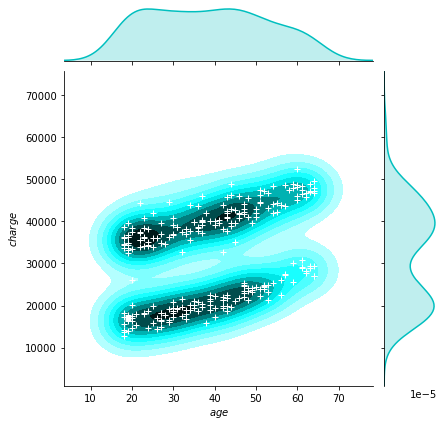

In [19]:
#smoker<흡연자들의> 나이와 치료비의 상관관계를 보기 위함
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$age$", "$charge$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

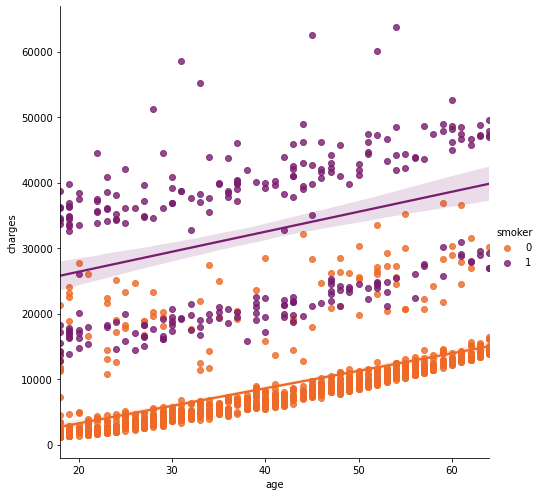

In [20]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

다이어트 - bmi

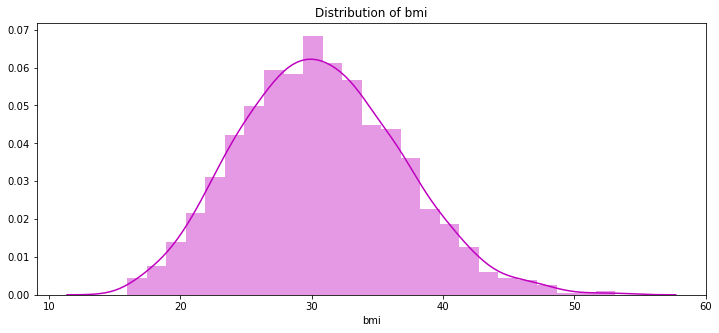

In [21]:
#bmi 분포
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

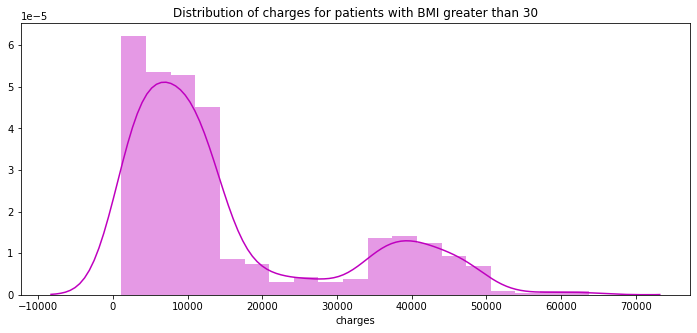

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

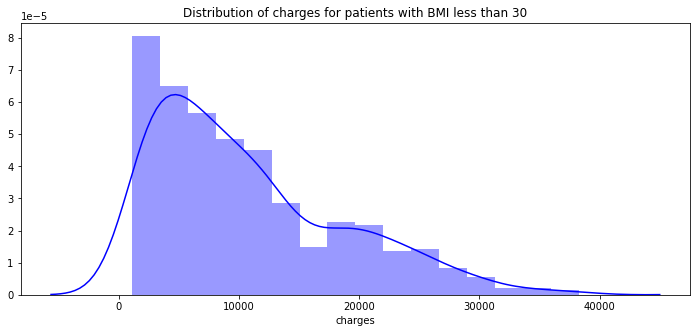

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

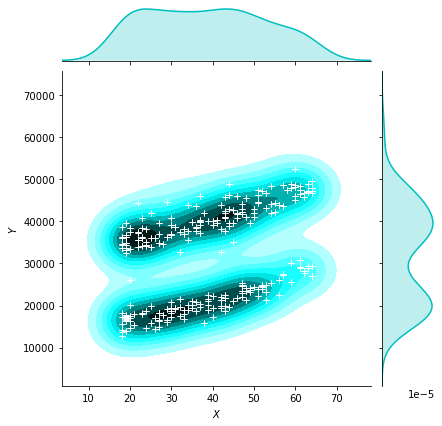

In [24]:
reg = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

<Figure size 720x432 with 0 Axes>

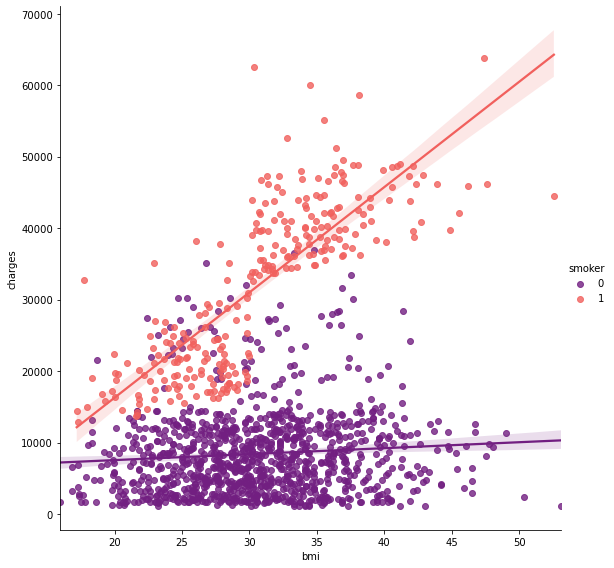

In [25]:
plt.figure(figsize=(10,6))
#ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

아이들

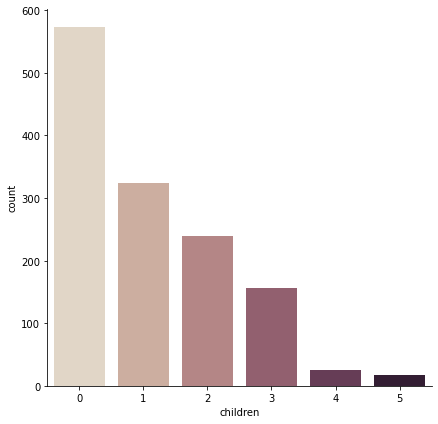

In [26]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)


Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

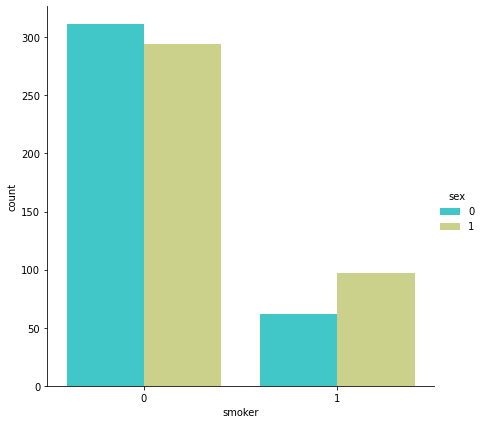

In [27]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

In [28]:
# 모델링

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [30]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [31]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147238


In [32]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873


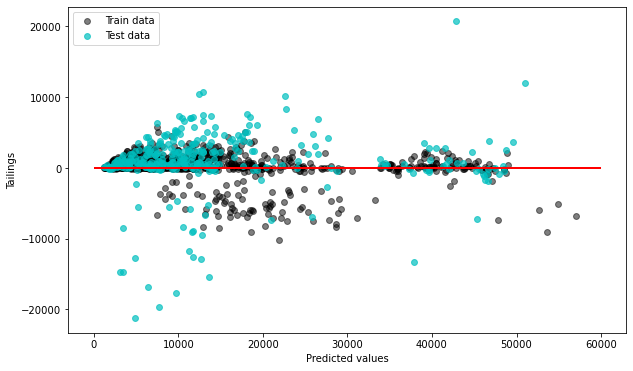

In [33]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# 회귀분석

<AxesSubplot:xlabel='charges'>

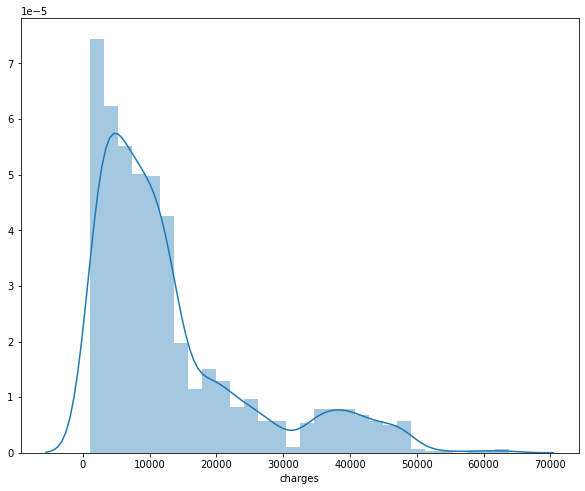

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
sns.distplot(data.charges)

타겟의 분포가 왼쪽으로 치우쳐져있으니 log변환을 해준다.

In [53]:
import copy

In [54]:
org_charges = copy.copy(data['charges'])


In [55]:
log_charges = np.log1p(data['charges']) 
data['charges'] = log_charges
data['charges']


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<AxesSubplot:xlabel='charges'>

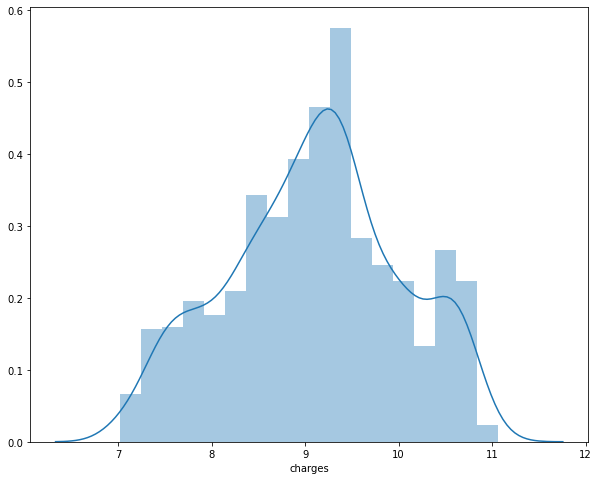

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
sns.distplot(log_charges)

아까보다 대칭적으로 분포하는 것을 볼 수 있다.  결과값에 expm1() 해서 원 상태로 바꿔주는 것 잊지 말기

In [11]:
#rmsle 로 예측 평가 -> rmse랑 뭐가다른거지 잘 한 거 맞나??

def get_rmse(model) :
    pred = model.predict(X_test)
    mse = mean_squared_error(np.expm1(y_test),np.expm1(pred))
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,' RMSE : ', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses
    
    
def visual_pred(model):
    train_pred =np.expm1(model.predict(X_train))
    #print(train_pred)
    pred = np.expm1(model.predict(X_test))
    #print(pred)
    plt.figure(figsize=(10,6))
    plt.scatter(train_pred,train_pred - np.expm1(y_train),c = 'black', marker = 'o', s = 35, alpha = 0.5,label = 'Train data')
    plt.scatter(pred,pred - np.expm1(y_test),c = 'c', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Tailings')
    plt.legend(loc = 'upper left')
    plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
    plt.show()

In [12]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

0.7890554824483482
0.7891755354472915
0.3103519115058895
LinearRegression  RMSE :  8390.372
Ridge  RMSE :  8317.41
Lasso  RMSE :  12273.368


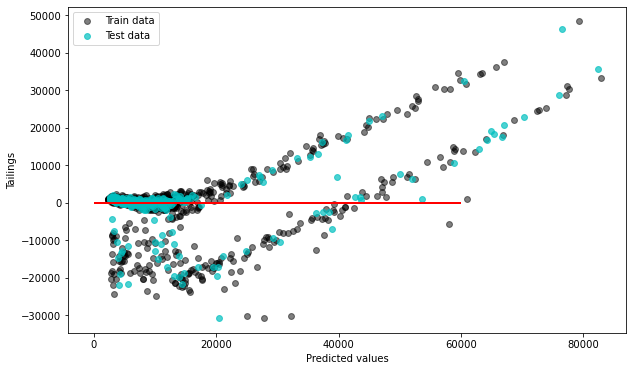

In [13]:
x = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 0,test_size=0.2)
lr = LinearRegression()
lr.fit(X_train,y_train)

X_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)


print(lr.score(X_test,y_test))
print(ridge_reg.score(X_test,y_test))
print(lasso_reg.score(X_test,y_test))
models = [lr,ridge_reg, lasso_reg]
get_rmses(models)

visual_pred(lr)

오차에 경향성이 보인다. 모델이 데이터를 잘 반영하지 못한 것 같다.

In [14]:
def get_top_bottom_coef(model,n=10):
    coef = pd.Series(model.coef_,index=x.columns)
    coef_high = coef.sort_values(ascending =False).head(n)
    coef_low = coef.sort_values(ascending =False).tail(n)
    return coef_high, coef_low

def visualize_coefficient(models):
    
    fig,axs = plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        
        axs[i_num].set_title(model.__class__.__name__ + 'Coeffiecents',size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax = axs[i_num])

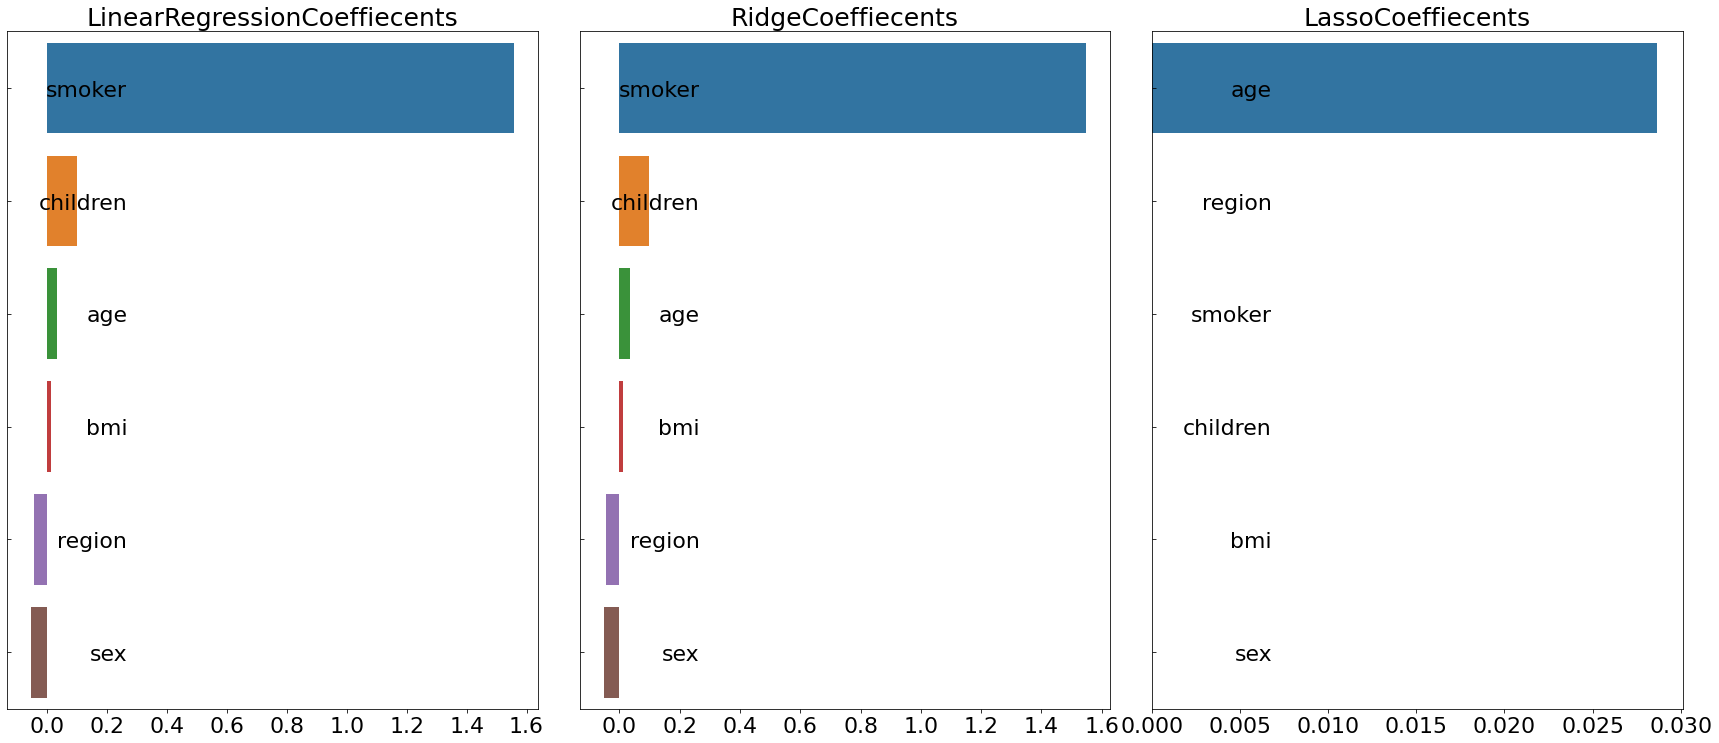

In [15]:
visualize_coefficient(models)

라소 모델에서 정확도가 낮게 나온 것은 smoker의 영향력을 과소평가했기 때문이다.

In [16]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        
        rmse_list = np.sqrt(-cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RLMSE 값 리스트 : {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('{0} CV 편균 RLMSE 값 {1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))
    


In [17]:
get_avg_rmse_cv(models)


LinearRegression CV RLMSE 값 리스트 : [0.428 0.512 0.372 0.443 0.466]
LinearRegression CV 편균 RLMSE 값 0.444

Ridge CV RLMSE 값 리스트 : [0.428 0.511 0.372 0.443 0.467]
Ridge CV 편균 RLMSE 값 0.444

Lasso CV RLMSE 값 리스트 : [0.81  0.758 0.762 0.775 0.819]
Lasso CV 편균 RLMSE 값 0.785


In [18]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
    grid_model = GridSearchCV(model, param_grid = params, scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(x,y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RLMSE 값 : {1}, 최적 alpha : {2}'.format(model.__class__.__name__,np.round(rmse,4),grid_model.best_params_))


In [19]:
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}

print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)


Ridge 5 CV 시 최적 평균 RLMSE 값 : 0.4466, 최적 alpha : {'alpha': 0.05}
Lasso 5 CV 시 최적 평균 RLMSE 값 : 0.4466, 최적 alpha : {'alpha': 0.001}


LinearRegression  RMSE :  8390.372
Ridge  RMSE :  8317.41
Lasso  RMSE :  12273.368


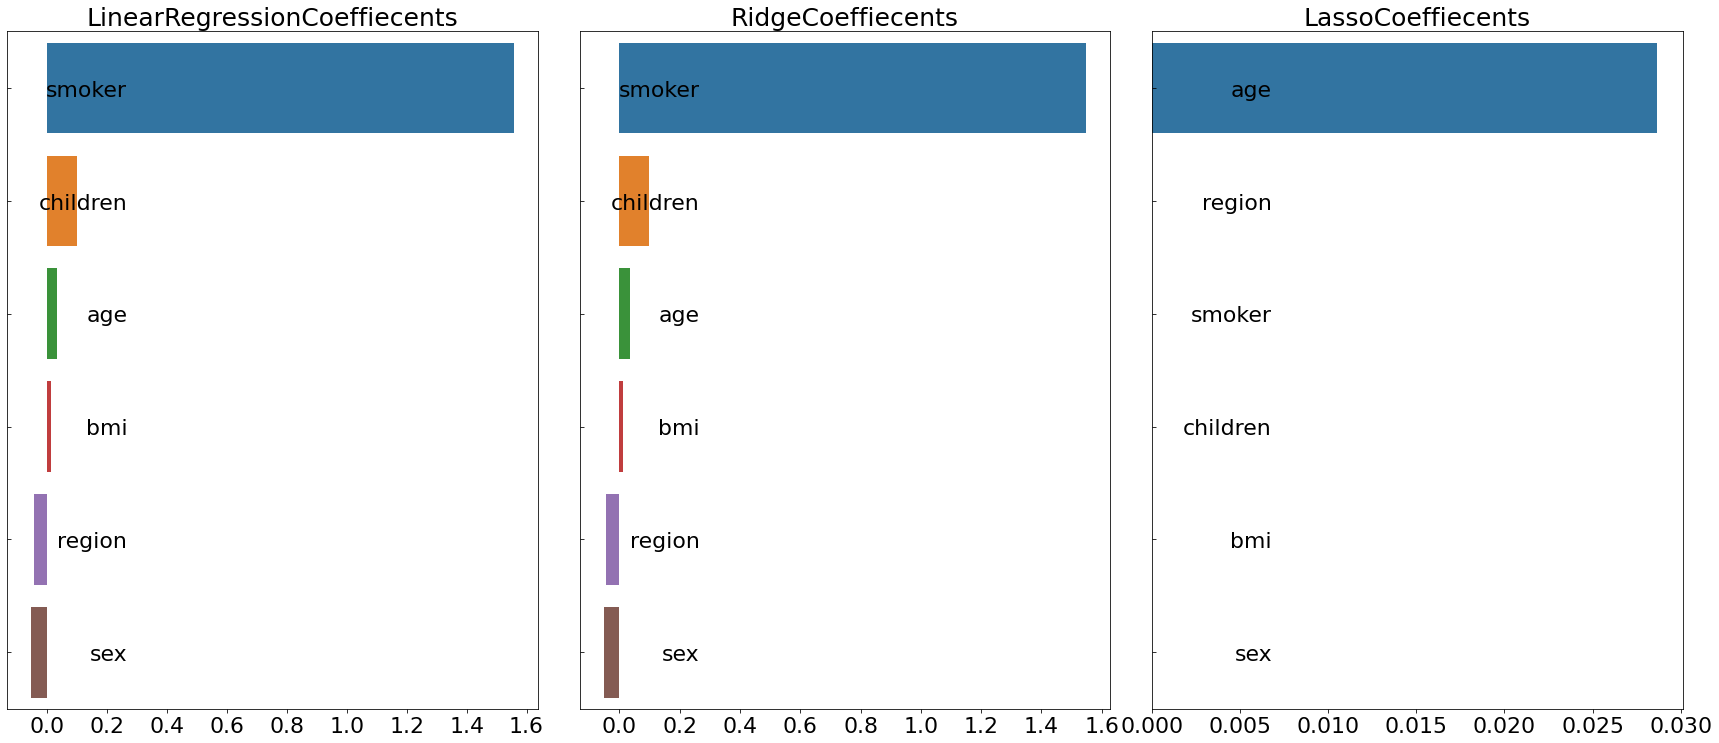

In [20]:
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

get_rmses(models)
visualize_coefficient(models)

In [21]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(np.expm1(y_test),np.expm1(pred_value))
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE : {1}'.format(key,rmse))

In [22]:
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종 혼합': pred, 'Ridge': ridge_pred, 'Lasso': lasso_pred}

In [23]:
get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 8359.753636148578
Ridge 모델의 RMSE : 8386.652079753016
Lasso 모델의 RMSE : 8342.018441220098


# 전처리

In [24]:
#원핫인코딩
data = pd.get_dummies(data,columns=['region'],prefix='region',drop_first=True)

In [25]:
#이상치 제거
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text
def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def get_outliers(df_in,col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    outliers_index = df_in.loc[(df_in[col_name] < minimum) | (df_in[col_name] > maximum)].index
    return outliers_index

In [66]:
data['charges'] = org_charges
org_charges
data['charges'] 

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

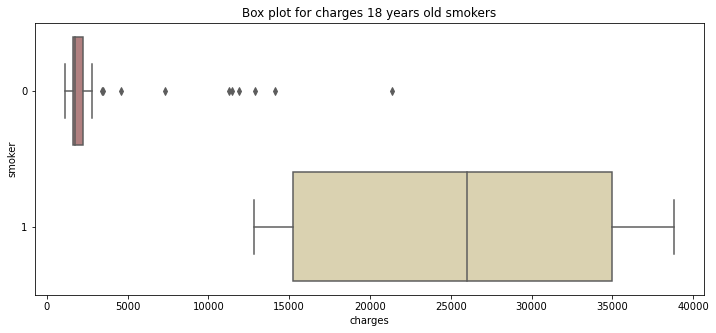

In [67]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

<AxesSubplot:xlabel='charges'>

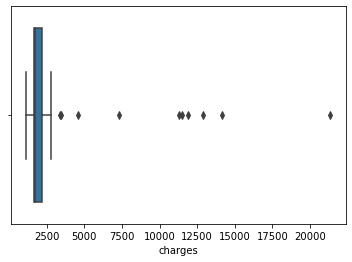

In [68]:
sns.boxplot(x="charges",data=data[(data.age == 18)&(data.smoker==0)])

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

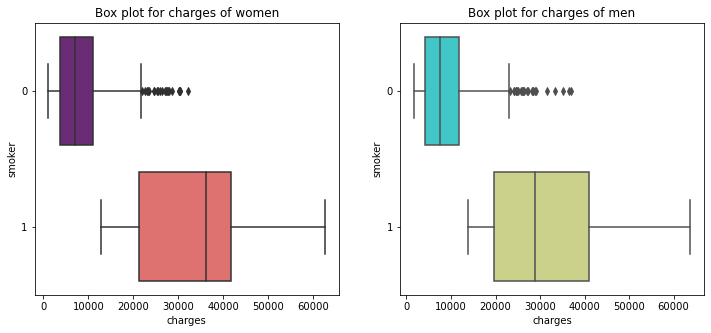

In [69]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

ax=f.add_subplot(122)
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

In [83]:
remove=list(get_outliers(data[(data.age == 18)&(data.smoker==0)],'charges'))
remove=remove+(list(get_outliers(data[(data.smoker==0)&(data.sex==1)],'charges')))
rempve=remove+(list(get_outliers(data[(data.smoker==0)&(data.sex==0)],'charges')))


print(remove)

[46, 102, 354, 369, 427, 525, 1080, 1095, 1215, 1315, 3, 62, 115, 140, 245, 289, 355, 379, 387, 430, 516, 539, 770, 925, 936, 959, 964, 980, 1008, 1039, 1211, 1258]


In [84]:
#이상치 제거
data = data.drop(index=remove, axis=0)

In [85]:
log_charges = np.log1p(data['charges']) 
data['charges'] = log_charges
data['charges']

0        9.734236
1        7.453882
2        8.400763
4        8.260455
5        8.231541
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1306, dtype: float64

# 타겟 변환

In [86]:
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data == input_data
        
    if p_degree !=None:
        scaled_data = PolynomialFeatures(degree=p_degree, inclued_bias=False).fit_transform(scaled_data)
    
    return scaled_data

0.8271154032954842
0.8269375613755487
0.3132473527393659
LinearRegression  로그 변환된 RMSE :  6804.779
Ridge  로그 변환된 RMSE :  6762.454
Lasso  로그 변환된 RMSE :  11426.607


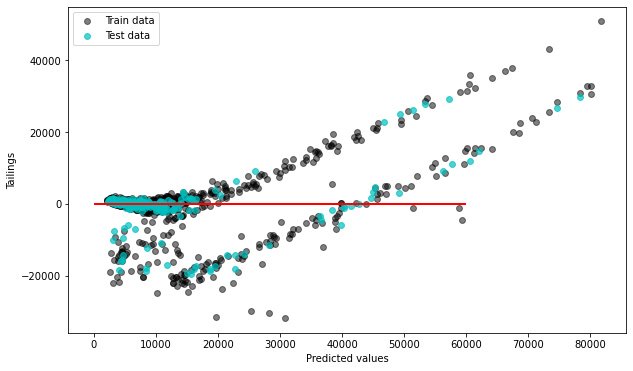

In [88]:
x = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 0,test_size=0.2)
lr = LinearRegression()
lr.fit(X_train,y_train)

X_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)


print(lr.score(X_test,y_test))
print(ridge_reg.score(X_test,y_test))
print(lasso_reg.score(X_test,y_test))
models = [lr,ridge_reg, lasso_reg]
get_rmses(models)

visual_pred(lr)

In [89]:
def get_top_bottom_coef(model,n=10):
    coef = pd.Series(model.coef_,index=x.columns)
    coef_high = coef.sort_values(ascending =False).head(n)
    coef_low = coef.sort_values(ascending =False).tail(n)
    return coef_high, coef_low

def visualize_coefficient(models):
    
    fig,axs = plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        
        axs[i_num].set_title(model.__class__.__name__ + 'Coeffiecents',size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax = axs[i_num])

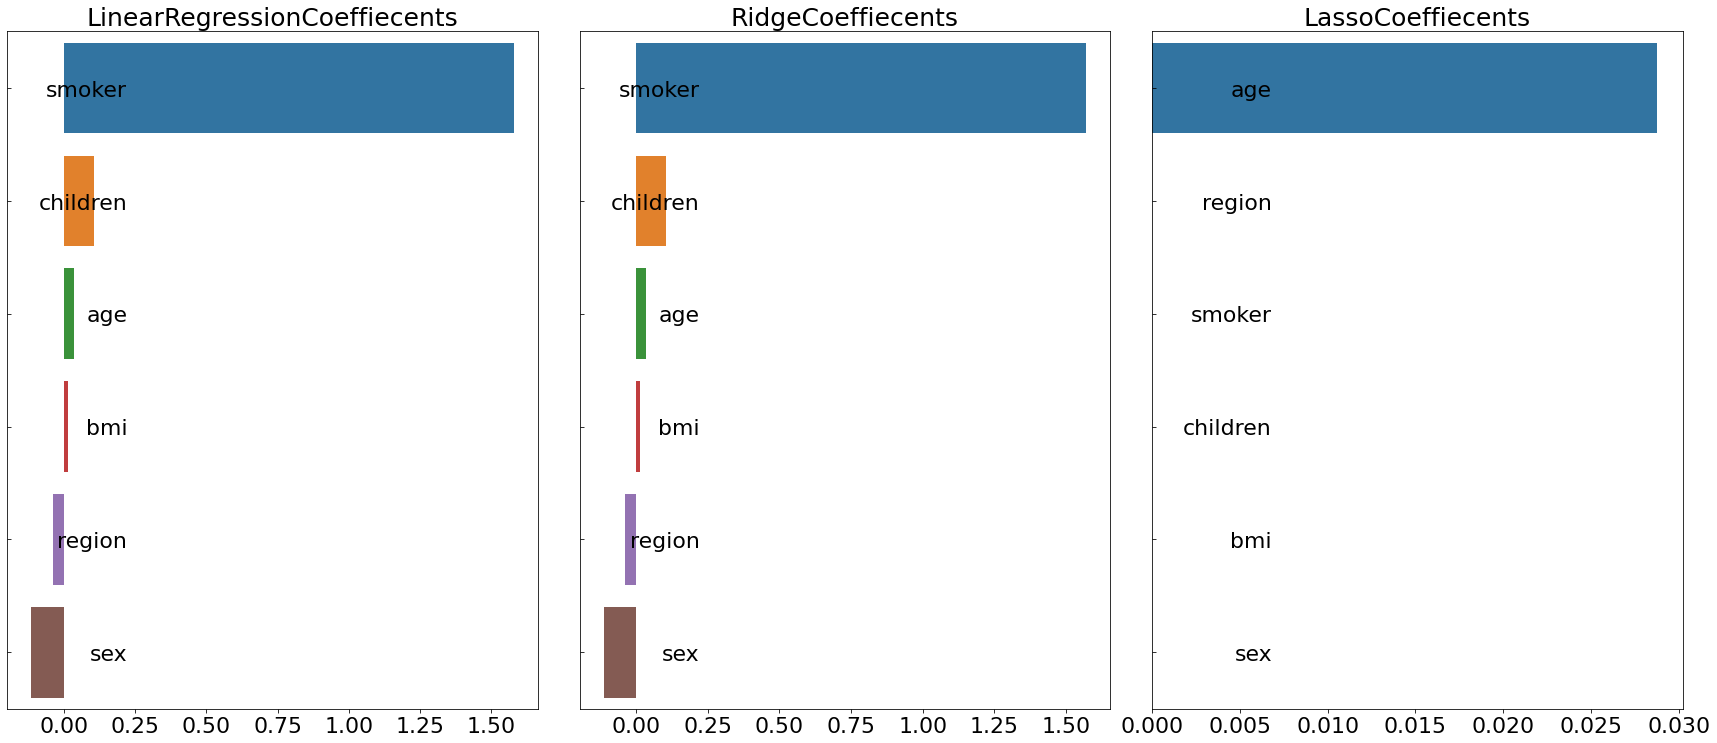

In [90]:
visualize_coefficient(models)

라소 모델에서 정확도가 낮게 나온 것은 smoker의 영향력을 과소평가했기 때문이다.

In [92]:
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트 : [0.375 0.443 0.357 0.397 0.441]
LinearRegression CV 편균 RMSE 값 0.402

Ridge CV RMSE 값 리스트 : [0.375 0.443 0.357 0.397 0.441]
Ridge CV 편균 RMSE 값 0.402

Lasso CV RMSE 값 리스트 : [0.804 0.743 0.757 0.774 0.82 ]
Lasso CV 편균 RMSE 값 0.779


In [94]:
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}

print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)


Ridge 5 CV 시 최적 평균 RLMSE 값 : 0.4039, 최적 alpha : {'alpha': 0.05}
Lasso 5 CV 시 최적 평균 RLMSE 값 : 0.404, 최적 alpha : {'alpha': 0.001}


LinearRegression  로그 변환된 RMSE :  6804.779
Ridge  로그 변환된 RMSE :  6762.454
Lasso  로그 변환된 RMSE :  11426.607


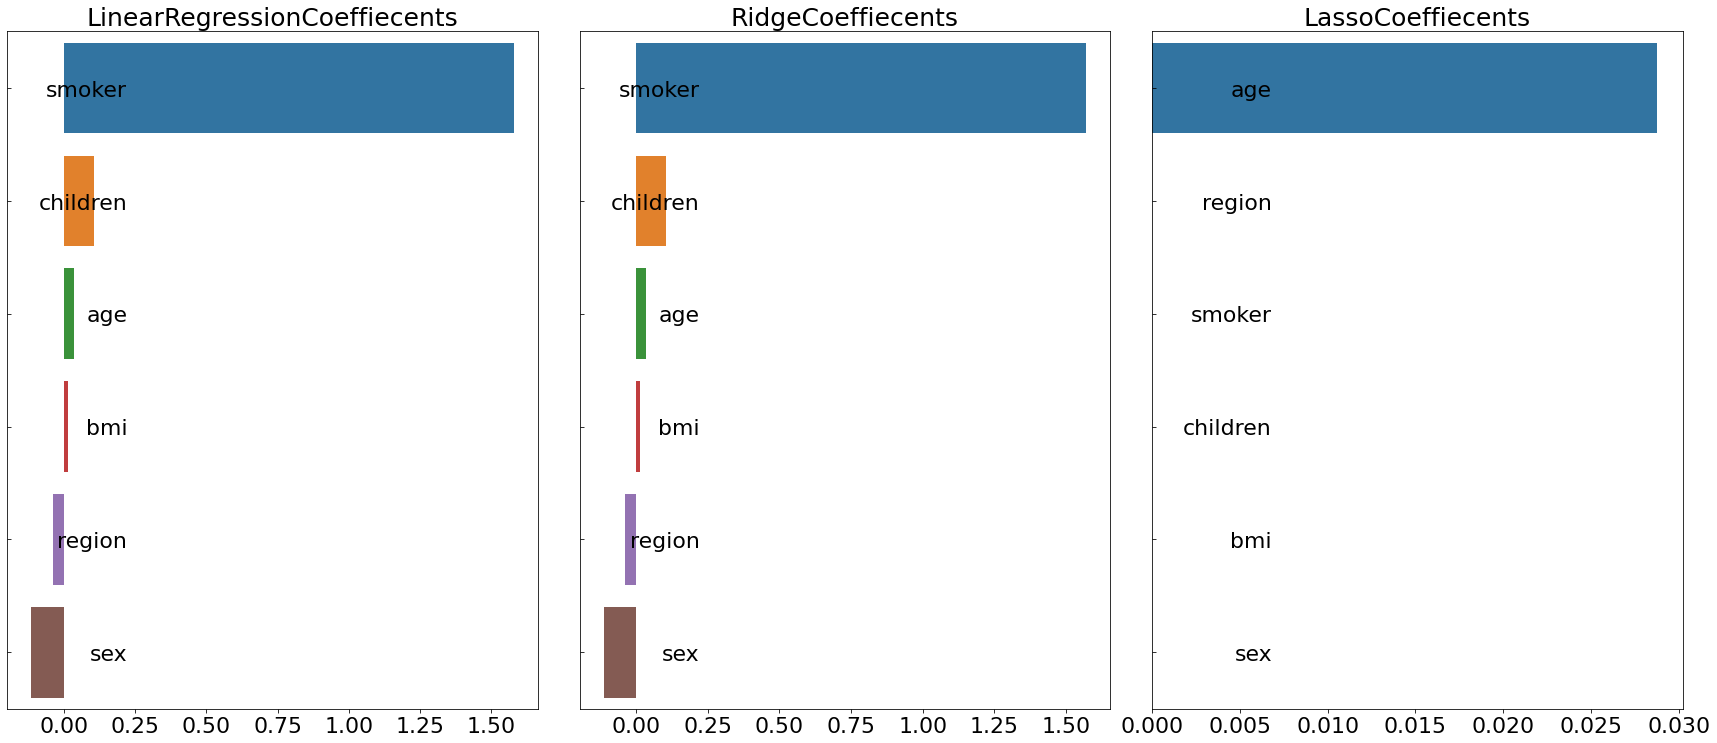

In [95]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

get_rmses(models)
visualize_coefficient(models)

In [97]:
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종 혼합': pred, 'Ridge': ridge_pred, 'Lasso': lasso_pred}

In [98]:
get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.3833270663826832
Ridge 모델의 RMSE : 0.3832551399336935
Lasso 모델의 RMSE : 0.3833810663606487
